In [56]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob

# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM0/wrfout_d01_2020-06-30_19:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM1/wrfout_d01_2020-06-30_19:00:00")
ncfile2 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM2/wrfout_d01_2020-06-30_19:00:00")
ncfile3 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM3/wrfout_d01_2020-06-30_19:00:00")
#import numpy as np
#unique_lu = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
#print("Unique LU_INDEX values:", unique_lu)

In [57]:
### Set the Variable you want to look at. ####
Var = "TSK"
VarLabel = "Surface Skin Temperature [K]"
Var0 = getvar(ncfile0, Var)
Var1 = getvar(ncfile1, Var)
Var2 = getvar(ncfile2, Var)
Var3 = getvar(ncfile3, Var)

### Let's plot the difference in the variable with various UCM models (1,2,3) compared to no UCM.

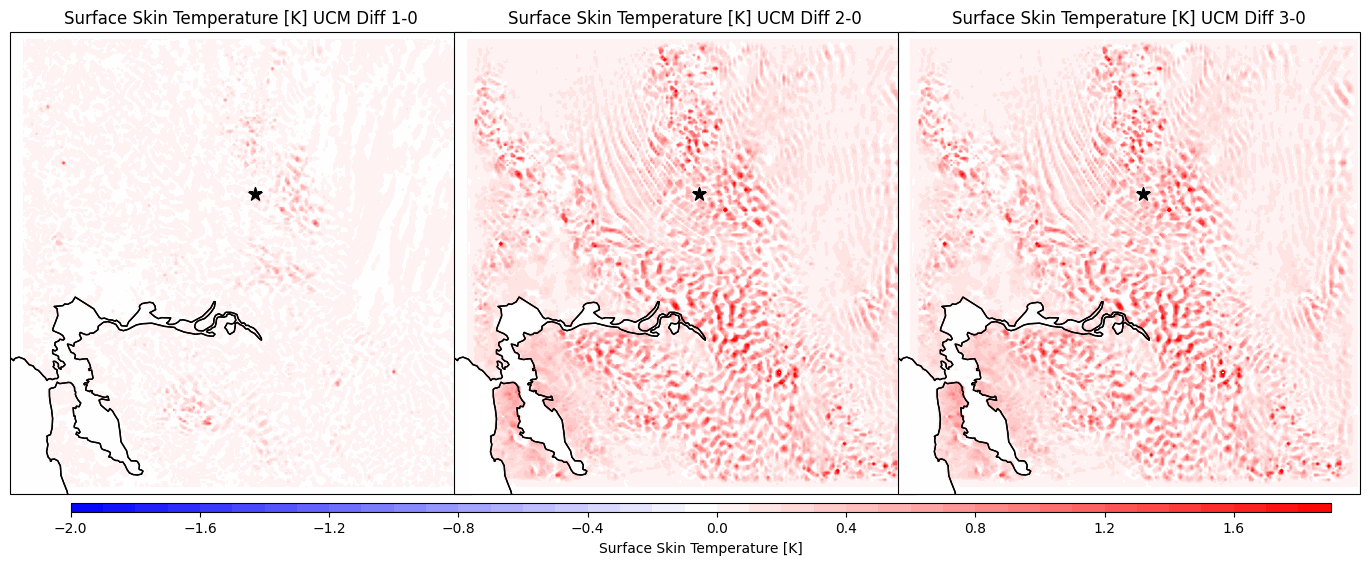

In [58]:

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.arange(-2, 2, 0.1)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title(VarEnglish+ " UCM Diff 1-0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) 
#, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title(VarEnglish+ " UCM Diff 2-0")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) 
#, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title(VarEnglish+ " UCM Diff 3-0")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) 
#, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label(VarEnglish)

plt.show()

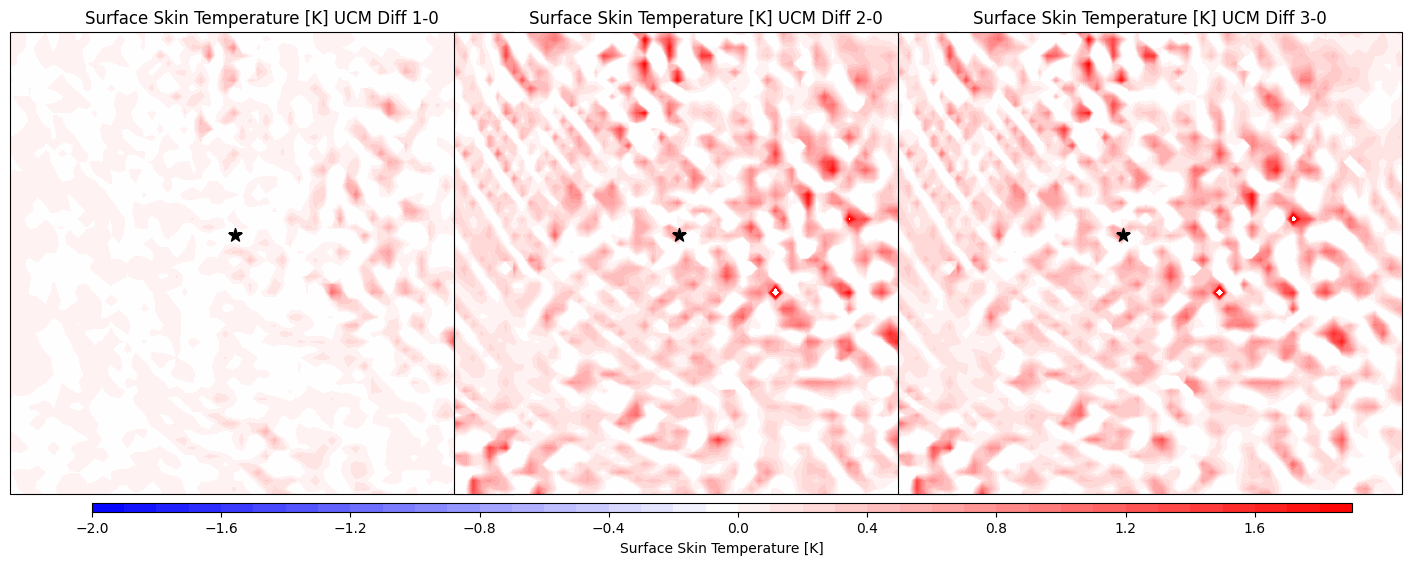

In [60]:
################ Remake the Variable Difference Plots zooming into the Sacramento area ######################
# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)

levels = np.arange(-2, 2, 0.1)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title(VarEnglish+ " UCM Diff 1-0")
# Zooming into Sacramento.
MyExtent = [-121.8,-121.1,38.3, 38.8]
ax0.set_extent(MyExtent, crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title(VarEnglish+ " UCM Diff 2-0")
ax1.set_extent(MyExtent, crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title(VarEnglish+ " UCM Diff 3-0")
ax2.set_extent(MyExtent, crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label(VarEnglish)

plt.show()

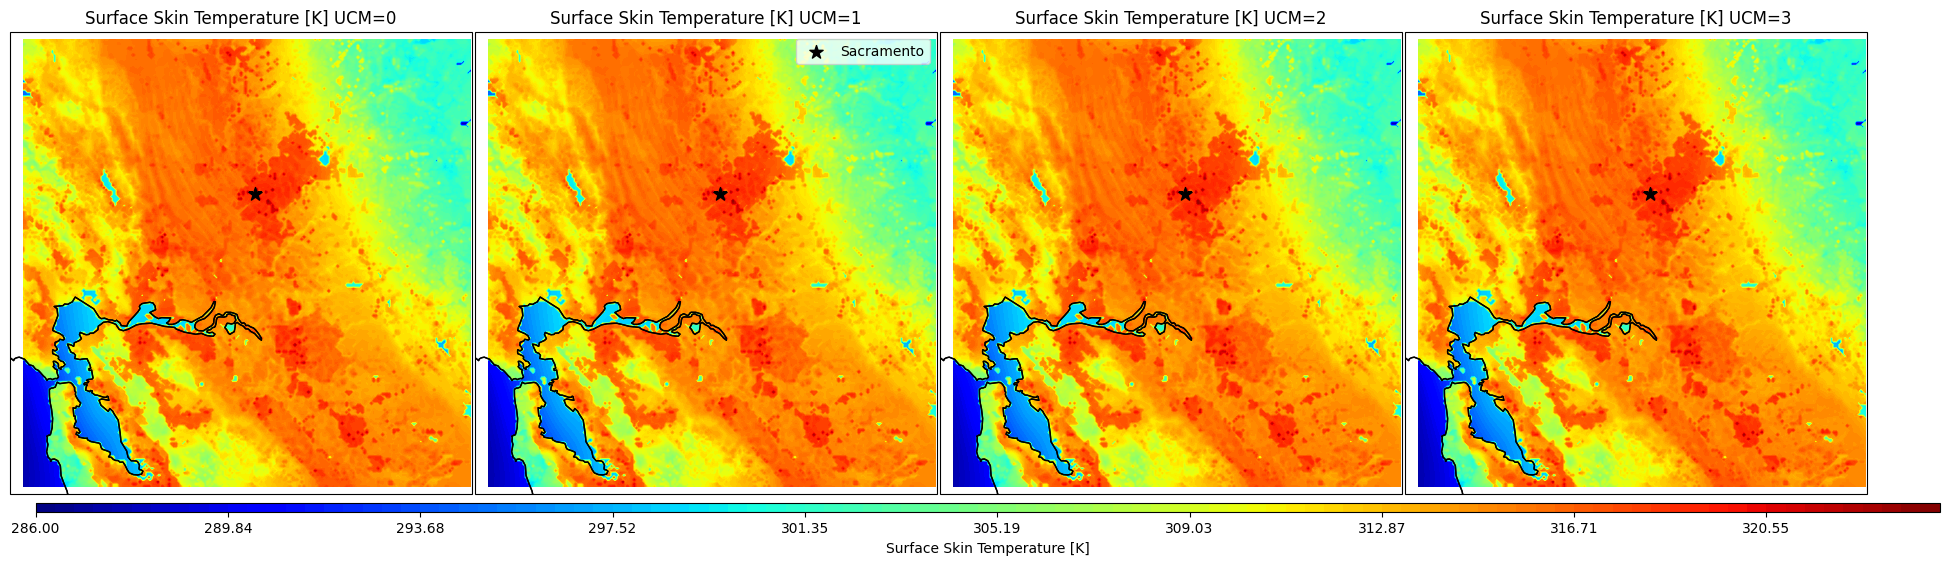

In [59]:
# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var2).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(), max(to_np(Var2).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title(VarEnglish+ " UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title(VarEnglish+ " UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
ax1.legend()

#  contour plot for UCM=2
ax2.set_title(VarEnglish+ " UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title(VarEnglish+ " UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax3.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label(VarEnglish)

plt.show()

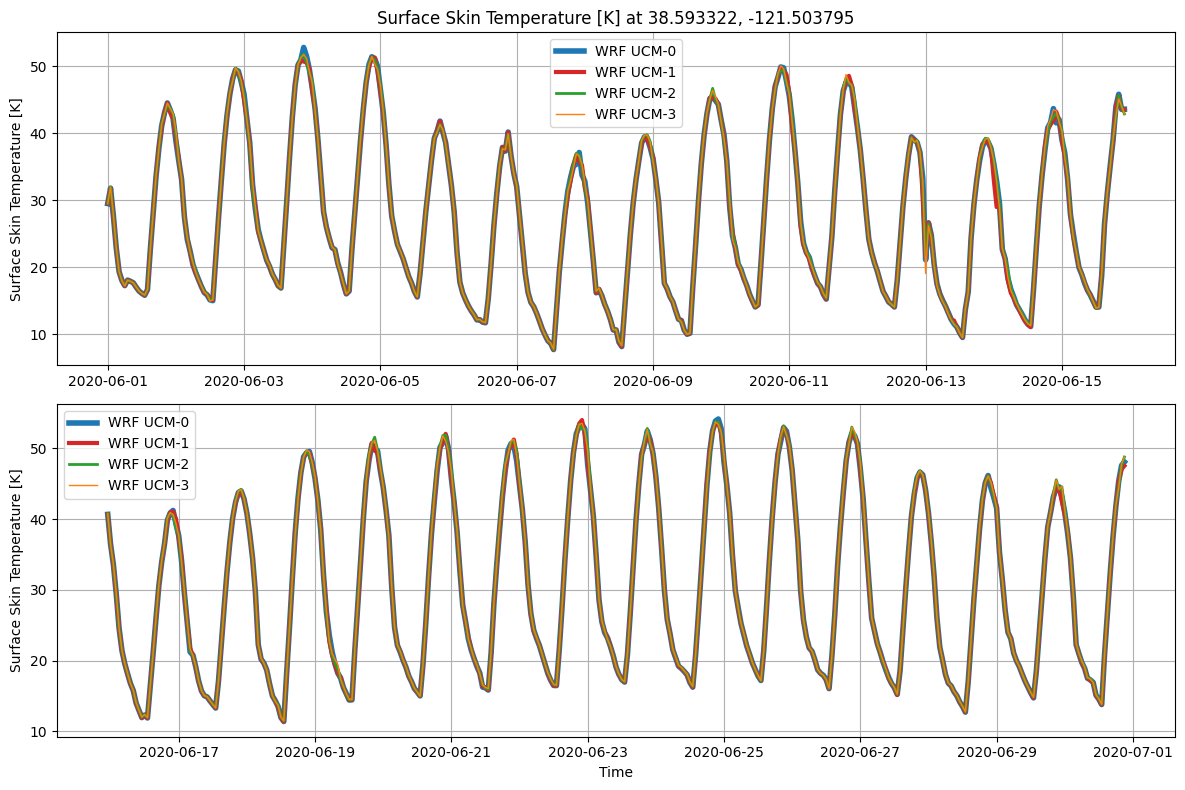

In [61]:
# === Location of the EPA site===
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
data_path0 = "/data/wto/WRF/WRFV4.5/test/em_real_UCM0/"  # Update if needed
file_pattern0 = "wrfout_d01_2020-06-*"
files0 = sorted(glob(f"{data_path0}/{file_pattern0}"))

data_path1 = "/data/wto/WRF/WRFV4.5/test/em_real_UCM1/"  # Update if needed
file_pattern1 = "wrfout_d01_2020-06-*"
files1 = sorted(glob(f"{data_path1}/{file_pattern1}"))

data_path2 = "/data/wto/WRF/WRFV4.5/test/em_real_UCM2/"  # Update if needed
file_pattern2 = "wrfout_d01_2020-06-*"
files2 = sorted(glob(f"{data_path2}/{file_pattern2}"))

data_path3 = "/data/wto/WRF/WRFV4.5/test/em_real_UCM3/"  # Update if needed
file_pattern3 = "wrfout_d01_2020-06-*"
files3 = sorted(glob(f"{data_path3}/{file_pattern3}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files0[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
Var_all_UCM0 = []
Var_all_UCM1 = []
Var_all_UCM2 = []
Var_all_UCM3 = []
Time_all = []

for ifile in range(0,len(files0)):

    Var_UCM0 = getvar(Dataset(files0[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM0.extend(to_np([Var_UCM0[y_idx, x_idx] - 273.15]))
    Time_all.append(Var_UCM0.Time.values)
    
    Var_UCM1 = getvar(Dataset(files1[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM1.extend(to_np([Var_UCM1[y_idx, x_idx] - 273.15]))
    
    Var_UCM2 = getvar(Dataset(files2[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM2.extend(to_np([Var_UCM2[y_idx, x_idx] - 273.15]))
    
    Var_UCM3 = getvar(Dataset(files3[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM3.extend(to_np([Var_UCM3[y_idx, x_idx] - 273.15]))
    
#### Setup the figures and axes.
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

#### Top subplot (first half)
axs[0].plot(Time_all[0:359], Var_all_UCM0[0:359],linewidth=4, label="WRF UCM-0", color='tab:blue')
axs[0].plot(Time_all[0:359], Var_all_UCM1[0:359],linewidth=3,  label="WRF UCM-1", color='tab:red')
axs[0].plot(Time_all[0:359], Var_all_UCM2[0:359],linewidth=2,  label="WRF UCM-2", color='tab:green')
axs[0].plot(Time_all[0:359], Var_all_UCM3[0:359],linewidth=1,  label="WRF UCM-3", color='tab:orange')
#axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel(VarLabel)
axs[0].set_title(VarLabel +" at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(Time_all[359:718], Var_all_UCM0[359:718],linewidth=4, label="WRF UCM-0", color='tab:blue')
axs[1].plot(Time_all[359:718], Var_all_UCM1[359:718],linewidth=3, label="WRF UCM-1", color='tab:red')
axs[1].plot(Time_all[359:718], Var_all_UCM2[359:718],linewidth=2, label="WRF UCM-2", color='tab:green')
axs[1].plot(Time_all[359:718], Var_all_UCM3[359:718],linewidth=1, label="WRF UCM-3", color='tab:orange')
#axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel(VarLabel)
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()